## Dragon Real state Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.286381,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.703656,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# %matplotlibinline

In [7]:
# # For histogram
# import matplotlib.pyplot as plt
# housing.hist(bins = 50 , figsize =(20, 24)) #histogram

In [8]:
#for learning purpose
import numpy as np
def split_train_test(data,test_ratio):
    np.random.seed(42)#for fix shuffled values one time
    shuffled = np.random.permutation(len(data)) #shuffle indices with random permutation
    print(shuffled)
    test_set_size = int(len(data) * test_ratio) #20% 0.2 test data
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]  #ilog specify rows and columns based on their row and column labels.



In [9]:
# train_set,test_set = split_train_test(housing, 0.2)

In [10]:
# print(f"Rows in traint set is: {len(train_set)}\nRows in test set is: {len(test_set)}")

In [11]:
from sklearn.model_selection import  train_test_split 
train_set,test_set = train_test_split (housing, test_size = 0.2, random_state = 42) 
print(f"Rows in traint set is: {len(train_set)}\nRows in test set is: {len(test_set)}")

Rows in traint set is: 404
Rows in test set is: 102


In [12]:
from sklearn.model_selection import StratifiedShuffleSplit#for same raito train and test
split = StratifiedShuffleSplit(n_splits =1, test_size = 0.2, random_state= 42)
for train_index,test_index in split.split(housing, housing['CHAS']):#house datatai stratified set kre dibe test train same ratio
    strain_train_set = housing.loc[train_index]
    strain_test_set = housing.loc[test_index]
    
          

In [13]:
  strain_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [14]:
  strain_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [15]:
#95/7

In [16]:

#376/28

In [17]:
housing =   strain_train_set.copy() #for only train we use imputer

# Looking For Correlations

In [18]:
coor_mattrix = housing.corr()
coor_mattrix['MEDV'].sort_values(ascending =  False) #Price is MEDV it is label

MEDV       1.000000
RM         0.678713
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

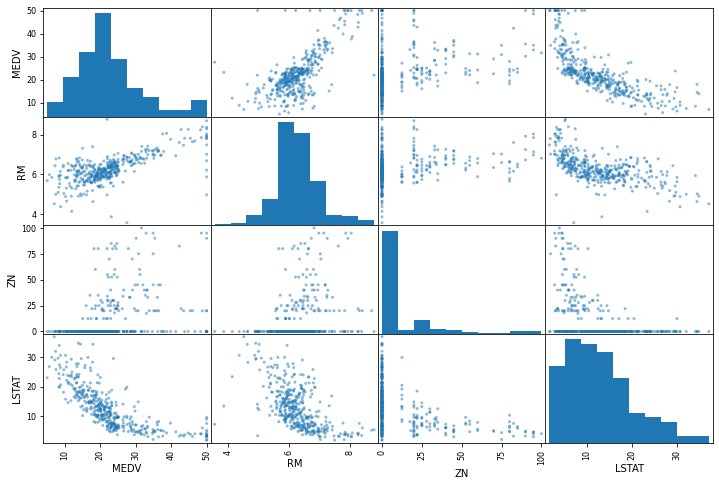

In [19]:
from pandas.plotting import scatter_matrix
attributes =["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize = (12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

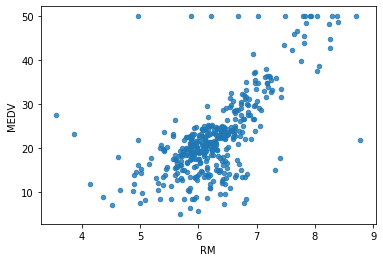

In [20]:
housing.plot(kind = "scatter", x="RM", y="MEDV", alpha = 0.8)

# Trying out attribute combinations

In [21]:
# housing["TAXRM"] = housing["TAX"]/housing["RM"]

In [22]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0


In [23]:
coor_mattrix = housing.corr()
coor_mattrix['MEDV'].sort_values(ascending =  False)

MEDV       1.000000
RM         0.678713
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [24]:
# housing.plot(kind = "scatter", x="TAXRM", y="MEDV", alpha = 0.8) #negative correlation

In [25]:
housing =   strain_train_set.drop("MEDV", axis = 1)  #alda krlam features 
housing_labels =   strain_train_set["MEDV"].copy()

# Mising attributes 

In [26]:
# to take care missing attributes , you have three options
# 1. get rid of the missing data points
# 2. get rid of whole attribute
# 3. set the value to some value( 0 ,mean or median) best

In [27]:
a = housing.dropna(subset=["RM"])#option 1
a.shape


(400, 13)

In [28]:
housing.drop("RM", axis =1).shape #option 2
#note that there is no Rm column and also note that orginal housing data frame remain unchanged

(404, 12)

In [29]:
median = housing["RM"].median()

In [30]:
housing["RM"].fillna(median)#option3 test set e fit krte hote pare jekahne 
#note that there is no Rm column and also note that orginal housing data frame remain unchanged

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

# housing.shape


In [31]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279835,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.714881,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.213500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [32]:
from sklearn.impute import SimpleImputer#for relax work, featrure asle abr jodi missing hoi and its only for  "Rm" value
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [33]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21350e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [34]:
X = imputer.transform(housing) #transform krte hbe new data Frame e

In [35]:
housing_tr = pd.DataFrame(X, columns = housing.columns) #fill missing values

In [36]:
housing_tr.describe() #imputer solve it And 404 is just treain value

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279178,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711354,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.213500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


# Scikit Learn Design

primarily , three types of object

1.Estimators - It eastimates some parameter based on dataset. Eg. Imputer
               It has a fit method and transform method.
               Fit method - Fits the dataset and calculates internal parameters

2.Transformers - takes input and returns output best on the learning fit from fit(). 
                 It also has a convenience function called fit transform(). Which fits and transform.

3.Predictors - LinearRegression model is a example of predictor. fit() and predict() are
               two common function. It also gives score function which will evaluate the predictions

# Feature Scaling

primarily, two types of feature scaling methods
1. Min-Max scaling(Normalization)
   (value - min)/(max-min) # 0 to 1 vlaue provide kre
   sklearn provides a class called MinMaxScaler for this
 
2. standardization
   (value-mean)/standard deveation
   Sklearn provides a class called StandardScaler for this
   

# Creating a pipeline

In [37]:
from sklearn.pipeline import Pipeline  #Pipeline  of transforms with a final estimator. ANd works as series of step can change
from sklearn.preprocessing import StandardScaler #pipeline can automate 
from sklearn.impute import SimpleImputer
my_pipeline = Pipeline([
    ('imputer',  SimpleImputer(strategy="median")),
    #.....add as many as you want in your pipeline
    ("std_scaler",  SimpleImputer(strategy="median"))
])


In [38]:
housing_num_tr = my_pipeline.fit_transform(housing) #housing _tr is final data 

In [39]:
housing_num_tr.shape #transform final numpy arrray


(404, 13)

# Selecting a desired model for Dragon Real State

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model =  LinearRegression() # comment out cause lin_msn is not so good
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)
 
    

RandomForestRegressor()

In [41]:
some_data = housing.iloc[:5]

In [42]:
some_labels = housing_labels.iloc[:5]

In [43]:
prepared_data = my_pipeline.transform(some_data)

In [44]:
model.predict(prepared_data) #give an array of prediction

array([22.346, 25.64 , 16.782, 23.406, 23.544])

In [45]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

# Evaluating The Model

In [46]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse =  mean_squared_error(housing_labels,housing_predictions)
rmse = np.sqrt(mse)

In [47]:
rmse  # 0 asle overfiting noise lesrn krle

1.2277708489069694

# Using better evaluation technique - Cross Validation

In [48]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv = 10) # so we can maximize utility
rmse_scores = np.sqrt(-scores)


In [49]:
rmse_scores #better prediction

array([2.95092943, 2.77212461, 4.38153038, 2.70073835, 3.88351844,
       2.65215137, 4.80557132, 3.30505191, 3.05347238, 3.17323811])

In [50]:
def print_scores(scores):
    print("Scroes :", scores)
    print("mean :", scores.mean())
    print("Standard deviation :", scores.std())
    

In [51]:
print_scores(rmse_scores)

Scroes : [2.95092943 2.77212461 4.38153038 2.70073835 3.88351844 2.65215137
 4.80557132 3.30505191 3.05347238 3.17323811]
mean : 3.367832630492559
Standard deviation : 0.7061960859641119


Quiz : convert this notebook to python file and run the pipeline into visual studio code

# Saving The Model

In [52]:
 from joblib import dump, load
 dump(model, 'Dragon.joblib') 

['Dragon.joblib']

# Testing the model on test data

In [53]:
X_test  =   strain_test_set .drop("MEDV", axis =1 )  #cause eita labels In test data
Y_test =   strain_test_set ["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse =  mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))

[24.604 11.821 25.968 21.908 18.902 14.686 19.663 14.4   30.708 41.789
 19.684 11.839 24.817 28.081 19.588 11.121 31.398 14.692 23.72  18.41
 19.658 17.87  18.386 21.958 18.393 31.131 16.128 32.329  9.052 33.515
 24.029 21.26  22.933 10.834 21.    11.131 42.952 24.217 23.246 41.982
 24.007 30.089 20.4   20.831 18.659 33.519 45.073 20.104 20.603 21.433
 20.885 14.378 21.078 15.327 24.677 33.406 42.195 28.966 19.622 20.626
 46.567  9.639 18.994 27.458 15.073 33.309 19.806 17.596 19.269 34.562
 25.763 23.222 21.396 22.389 34.271 12.865 15.808 20.17  20.793 20.866
 22.465 20.922 13.732 23.099 20.469 20.975 14.019 21.381 21.512 23.373
 18.651 27.455  7.546 26.377 19.136 29.091 19.999 30.558 14.248 26.098
 21.397 20.534] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1,

In [54]:
final_rmse 

2.850046944917802

In [55]:
prepared_data


array([[4.81900e-02, 8.00000e+01, 3.64000e+00, 0.00000e+00, 3.92000e-01,
        6.10800e+00, 3.20000e+01, 9.22030e+00, 1.00000e+00, 3.15000e+02,
        1.64000e+01, 3.92890e+02, 6.57000e+00],
       [1.50100e-02, 8.00000e+01, 2.01000e+00, 0.00000e+00, 4.35000e-01,
        6.63500e+00, 2.97000e+01, 8.34400e+00, 4.00000e+00, 2.80000e+02,
        1.70000e+01, 3.90940e+02, 5.99000e+00],
       [4.87141e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.14000e-01,
        6.48400e+00, 9.36000e+01, 2.30530e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.96210e+02, 1.86800e+01],
       [1.81590e-01, 0.00000e+00, 7.38000e+00, 0.00000e+00, 4.93000e-01,
        6.37600e+00, 5.43000e+01, 4.54040e+00, 5.00000e+00, 2.87000e+02,
        1.96000e+01, 3.96900e+02, 6.87000e+00],
       [3.03470e-01, 0.00000e+00, 7.38000e+00, 0.00000e+00, 4.93000e-01,
        6.31200e+00, 2.89000e+01, 5.41590e+00, 5.00000e+00, 2.87000e+02,
        1.96000e+01, 3.96900e+02, 6.15000e+00]])

# using models

In [56]:
from joblib import dump, load
import numpy as np
model = load('Dragon.joblib')
features = np.array([[4.8190e-02, 8.0000e+01, 3.6400e+00, 0.0000e+00, 3.9200e-01,
       6.1080e+00, 3.2000e+01, 9.2203e+00, 1.0000e+00, 3.1500e+02, #features
       1.6400e+01, 3.9289e+02, 6.5700e+00]])
model.predict(features ) #output is price

array([22.346])